In [61]:
import pandas as pd

df = pd.read_excel("combined_data.xlsx")
df.head()

,data,HORA_UTC,temperatura_do_ar,umidade_relativa,vento_velocidade_m_s,alerta
0,01/01/2010,10:00,19.3,96,1.6,green
1,01/01/2010,11:00,20.6,91,2.2,green
2,01/01/2010,12:00,20.9,88,3.6,green
3,01/01/2010,13:00,21.1,89,3.5,green
4,01/01/2010,14:00,23.5,75,3.1,green


In [62]:
# Converter colunas de data e hora para datetime
df['data_hora'] = pd.to_datetime(df['data'] + ' ' + df['HORA_UTC'], format="%d/%m/%Y %H:%M")

# Agrupar por data (ignorando hora) e calcular médias
df = df.groupby(df['data_hora'].dt.date).agg({
    'temperatura_do_ar': 'mean',
    'umidade_relativa': 'mean',
    'vento_velocidade_m_s': 'mean',
    'alerta': lambda x: x.mode()[0]  # pega o valor mais frequente
}).reset_index()

# Renomear a coluna de data
df = df.rename(columns={'data_hora': 'data'})

#manter o formato original da data (dd/mm/aaaa)
df['data'] = df['data'].astype(str).apply(lambda x: pd.to_datetime(x).strftime('%d/%m/%Y'))

print(df)

            data  temperatura_do_ar  umidade_relativa  vento_velocidade_m_s  \
0     01/01/2010          22.035714         82.500000              2.592857   
1     02/01/2010          21.333333         79.541667              3.737500   
2     03/01/2010          22.829167         72.541667              2.887500   
3     04/01/2010          23.900000         61.250000              3.066667   
4     05/01/2010          24.391667         60.416667              1.895833   
...          ...                ...               ...                   ...   
3280  27/12/2018          21.379167         80.916667              1.725000   
3281  28/12/2018          20.866667         83.125000              1.483333   
3282  29/12/2018          21.100000         75.708333              2.854167   
3283  30/12/2018          22.504167         71.958333              2.575000   
3284  31/12/2018          21.358333         80.666667              1.962500   

     alerta  
0     green  
1     green  
2     gre

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3285 entries, 0 to 3284
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   data                  3285 non-null   object 
 1   temperatura_do_ar     3285 non-null   float64
 2   umidade_relativa      3285 non-null   float64
 3   vento_velocidade_m_s  3285 non-null   float64
 4   alerta                3285 non-null   object 
dtypes: float64(3), object(2)
memory usage: 128.4+ KB


In [64]:
# substituir valores -9999 por NaN
df = df.replace(-9999, pd.NA)

df = df[df != -9999].dropna()

df


,data,temperatura_do_ar,umidade_relativa,vento_velocidade_m_s,alerta
0,01/01/2010,22.035714,82.500000,2.592857,green
1,02/01/2010,21.333333,79.541667,3.7375,green
2,03/01/2010,22.829167,72.541667,2.8875,green
3,04/01/2010,23.900000,61.250000,3.066667,green
4,05/01/2010,24.391667,60.416667,1.895833,green
...,...,...,...,...,...
3280,27/12/2018,21.379167,80.916667,1.725,green
3281,28/12/2018,20.866667,83.125000,1.483333,green
3282,29/12/2018,21.100000,75.708333,2.854167,green
3283,30/12/2018,22.504167,71.958333,2.575,green


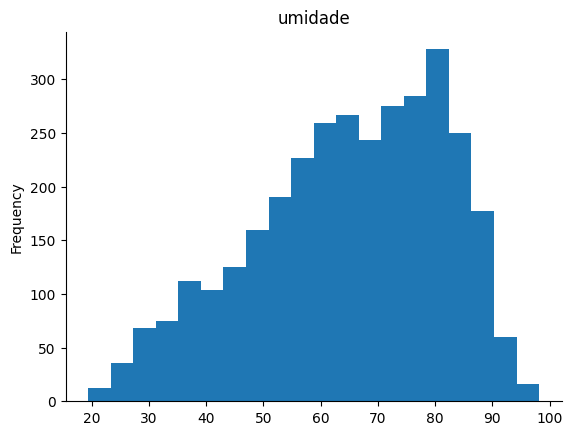

In [65]:
df['umidade_relativa'].plot(kind='hist', bins=20, title='umidade')
plt.gca().spines[['top', 'right',]].set_visible(False)

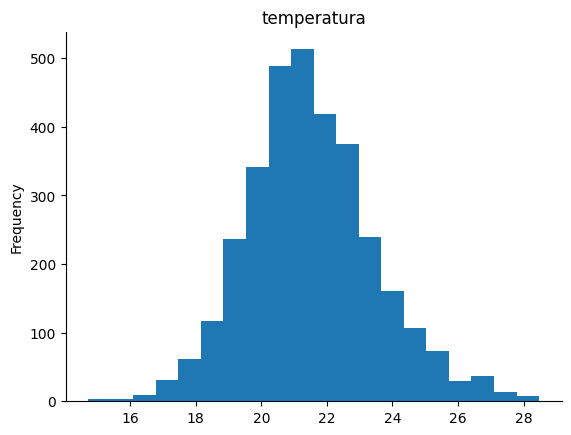

In [66]:
df['temperatura_do_ar'].plot(kind='hist', bins=20, title='temperatura')
plt.gca().spines[['top', 'right',]].set_visible(False)

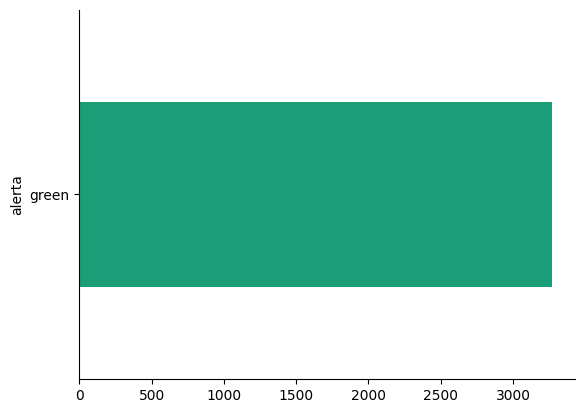

In [70]:
import seaborn as sns
df.groupby('alerta').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [71]:
df.to_excel("resultado.xlsx")

In [72]:
import pandas as pd
df = pd.read_excel("train.xlsx")
df.head()

,temperatura,umidade,alerta
0,39,26,yellow
1,49,87,green
2,36,64,green
3,20,85,green
4,16,62,green


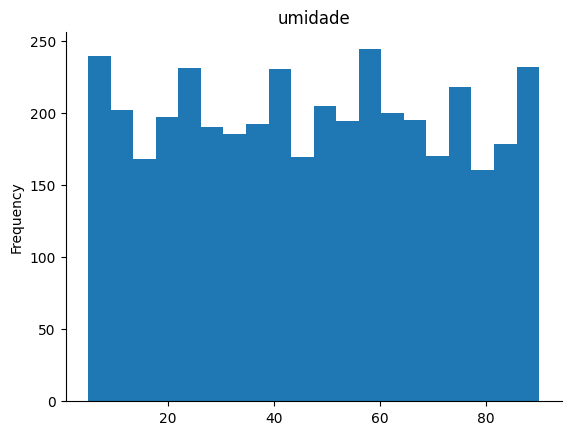

In [73]:
from matplotlib import pyplot as plt
df['umidade'].plot(kind='hist', bins=20, title='umidade')
plt.gca().spines[['top', 'right',]].set_visible(False)

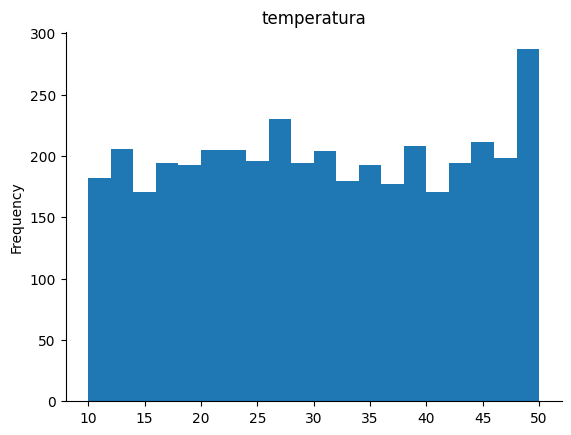

In [74]:
df['temperatura'].plot(kind='hist', bins=20, title='temperatura')
plt.gca().spines[['top', 'right',]].set_visible(False)

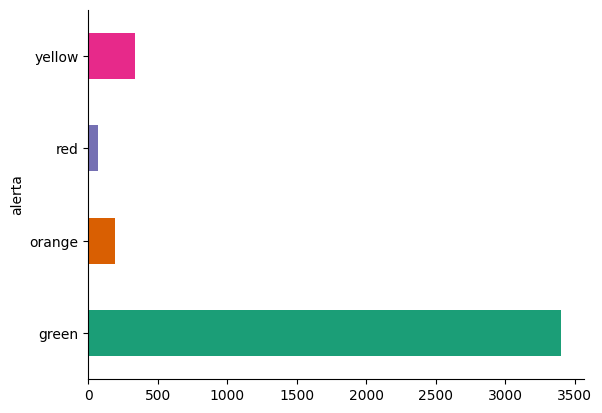

In [75]:
import seaborn as sns
df.groupby('alerta').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [76]:
from sklearn.model_selection import train_test_split
X = df.drop('alerta', axis=1)
y = df['alerta']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
df.head()

,temperatura,umidade,alerta
0,39,26,yellow
1,49,87,green
2,36,64,green
3,20,85,green
4,16,62,green


In [77]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
# Aplicando StandardScaler
scaler_standard = StandardScaler()
X_scaled = scaler_standard.fit_transform(X)
# Aplicando MinMaxScaler
scaler_minmax = MinMaxScaler()
X_minmax_scaled = scaler_minmax.fit_transform(X)
# Mostrando as primeiras linhas dos dados escalados
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled.head()
df_minmax = pd.DataFrame(X_minmax_scaled, columns=X.columns)
df_minmax.head()

,temperatura,umidade
0,0.725,0.247059
1,0.975,0.964706
2,0.650,0.694118
3,0.250,0.941176
4,0.150,0.670588


In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans, DBSCAN
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
import matplotlib.pyplot as plt

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)

# Testando diferentes algoritmos de classificação
# Random Forest
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
accuracy_rf = model_rf.score(X_test, y_test)
print(f"Acurácia com Random Forest: {accuracy_rf:.2f}")
# SVM
model_svm = SVC()
model_svm.fit(X_train, y_train)
accuracy_svm = model_svm.score(X_test, y_test)
print(f"Acurácia com SVM: {accuracy_svm:.2f}")
# KNN
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
accuracy_knn = model_knn.score(X_test, y_test)
print(f"Acurácia com KNN: {accuracy_knn:.2f}")

#modelo Naive Bayes
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
accuracy_nb = model_nb.score(X_test, y_test)
print(f"Acurácia com Naive Bayes: {accuracy_nb:.2f}")

#modelo de Regressão Logística
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)
accuracy_lr = model_lr.score(X_test, y_test)
print(f"Acurácia com Regressão Logística: {accuracy_lr:.2f}")

Acurácia com Random Forest: 1.00
Acurácia com SVM: 0.98
Acurácia com KNN: 1.00
Acurácia com Naive Bayes: 0.94
Acurácia com Regressão Logística: 0.93


In [79]:
# Importando todas as métricas necessárias
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Calculando e exibindo a Acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")
# Calculando e exibindo a Precisão
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precisão (Weighted): {precision:.2f}")
# Calculando e exibindo o Recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall (Weighted): {recall:.2f}")
# Calculando e exibindo o F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score (Weighted): {f1:.2f}")
# Calculando e exibindo a Matriz de Confusão
matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(matrix)

Acurácia: 1.00
Precisão (Weighted): 1.00
Recall (Weighted): 1.00
F1-Score (Weighted): 1.00
Matriz de Confusão:
[[1031    0    0    0]
 [   0   59    0    3]
 [   0    0   17    0]
 [   1    0    0   89]]
